<a href="https://colab.research.google.com/github/franov/r/blob/main/Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizando R desde GitHub -  Parte II
Leyendo el archivo de datos **puntajes_estudiantes.csv** desde GitHub para utilizarlo dentro de Colab con R.

La base de datos contiene información demográfica de estudiantes chilenos y el puntaje obtenido en matemática y lenguaje (escritura y lectura).

La estructura de la fuente de información es la siguiente:
* **comuna**: Corresponde a la comuna de residencia del estudiante.
    * **Tipo de variable**: variable cualitativa nominal
* **educacional_parental**: Corresponde al nivel educacional de los padres del estudiante.
    * **Tipo de variable**: variable cualitativa ordinal
* **almuerzo**: Corresponde a conocer como el estudiante recibe su almuerzo en el periodo de clases
    * **Tipo de variable**: variable cualitativa nominal
* **taller_apoyo**: Correponde a una variable dicotómica para indicar si el estudiante ha recibido o no un taller de apoyo en las materias señaladas.
    * **Tipo de variable**: variable cualitativa nominal
* **matematicas**: Corresponde a una variable numérica que indica la nota obtenida en matemáticas.
    * **Tipo de variable**: variable cuantitativa discreta
* **lectura**: Corresponde a una variable numérica que indica la nota obtenida en lectura.
    * **Tipo de variable**: variable cuantitativa discreta
* **escritura**: Corresponde a una variable numérica que indica la nota obtenida en escritura.
    * **Tipo de variable**: variable cuantitativa discreta
* **sexo**: Sexo del estudiante
    * **Tipo de variable**: variable cualitativa nominal



## Montando librerías para leer archivos desde Github

Se cargan las librerías necesarias para realizar la lectura de archivos desde R


In [3]:
library(readr)  # for read_csv
library(knitr)  # for kable

Se carga el archivo en la variable estudiantes desde GitHub

In [4]:
file <- "https://raw.githubusercontent.com/franov/r/main/puntajes_estudiantes.csv"
puntaje <- read.table(file, sep=";", header=TRUE)

## Comienzo del análisis de datos

### Lectura del encabezado del archivo

In [5]:
head(puntaje)

,comuna,educacional_parental,almuerzo,taller_apoyo,matematicas,lectura,escritura,sexo
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Pudahuel,profesional,estandar,no,0.72,0.72,0.74,M
2,Santiago,tecnica,estandar,si,0.69,0.90,0.88,M
3,Pudahuel,postgrado,estandar,no,0.90,0.95,0.93,M
4,Lo_Prado,tecnica,beca,no,0.47,0.57,0.44,H
5,Santiago,tecnica,estandar,no,0.76,0.78,0.75,H
6,Pudahuel,tecnica,estandar,no,0.71,0.83,0.78,M


### Conociendo la estructura de la base de datos

In [6]:
str(puntaje)

'data.frame':	1000 obs. of  8 variables:
 $ comuna              : chr  " Pudahuel" " Santiago" " Pudahuel" " Lo_Prado" ...
 $ educacional_parental: chr  "profesional" "tecnica" "postgrado" "tecnica" ...
 $ almuerzo            : chr  "estandar" "estandar" "estandar" "beca" ...
 $ taller_apoyo        : chr  "no" "si" "no" "no" ...
 $ matematicas         : num  0.72 0.69 0.9 0.47 0.76 0.71 0.88 0.4 0.64 0.38 ...
 $ lectura             : num  0.72 0.9 0.95 0.57 0.78 0.83 0.95 0.43 0.64 0.6 ...
 $ escritura           : num  0.74 0.88 0.93 0.44 0.75 0.78 0.92 0.39 0.67 0.5 ...
 $ sexo                : chr  "M" "M" "M" "H" ...


### Generando un resumen de los datos



In [7]:
summary(puntaje)

    comuna          educacional_parental   almuerzo         taller_apoyo      
 Length:1000        Length:1000          Length:1000        Length:1000       
 Class :character   Class :character     Class :character   Class :character  
 Mode  :character   Mode  :character     Mode  :character   Mode  :character  
                                                                              
                                                                              
                                                                              
  matematicas        lectura         escritura          sexo          
 Min.   :0.0000   Min.   :0.1700   Min.   :0.1000   Length:1000       
 1st Qu.:0.5700   1st Qu.:0.5900   1st Qu.:0.5775   Class :character  
 Median :0.6600   Median :0.7000   Median :0.6900   Mode  :character  
 Mean   :0.6609   Mean   :0.6917   Mean   :0.6805                     
 3rd Qu.:0.7700   3rd Qu.:0.7900   3rd Qu.:0.7900                     
 Max.   :1.0000   Max

### Grupos de histogramas

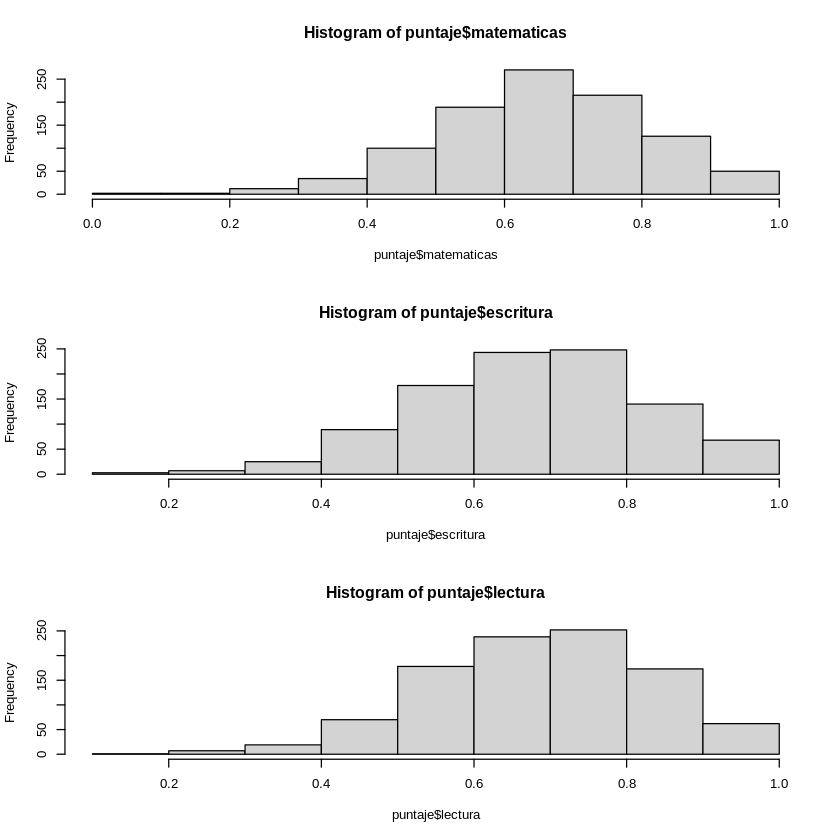

In [20]:
par(mfrow = c(3, 1))
hist(puntaje$matematicas)
hist(puntaje$escritura)
hist(puntaje$lectura)

Los datos de los puntajes evidencian que poseen un sesgo negativo (hacia la derecha), lo que hace que tenga impacto sobre las medidas de tendencia central. 

### Probando la normalidad en los datos

Normalidad con Test Shapiro-Wilk en puntaje de matemáticas

In [12]:
shapiro.test(puntaje$matematicas)


	Shapiro-Wilk normality test

data:  puntaje$matematicas
W = 0.99315, p-value = 0.0001455


Normalidad con Test Shapiro-Wilk en puntaje de lectura

In [13]:
shapiro.test(puntaje$lectura)


	Shapiro-Wilk normality test

data:  puntaje$lectura
W = 0.99292, p-value = 0.0001055


Normalidad con Test Shapiro-Wilk en puntaje de escritura

In [14]:
shapiro.test(puntaje$escritura)


	Shapiro-Wilk normality test

data:  puntaje$escritura
W = 0.99196, p-value = 2.922e-05


Dado que el test Shapiro-Wilk indica que el valor P de la prueba de normalidad es inferior a 0.05 en todas las variables (matemáticas, escritura y lectura) entonces, como vimos en los histogramas, las variables no se encuentran distribuidas de manera normal y debemos utilizar una prueba no paramétrica como Kruswall-Wallis

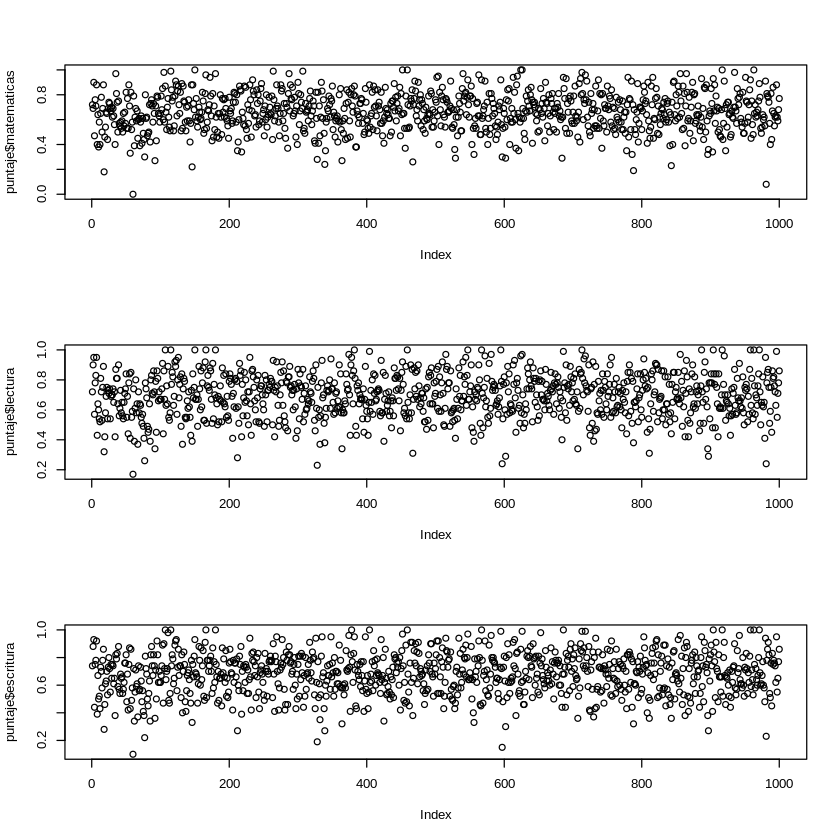

In [34]:
par(mfrow = c(3,1))
plot(puntaje$matematicas)
plot(puntaje$lectura)
plot(puntaje$escritura)

### Prueba Kruskal-Wallis
La prueba de Kruskal-Wallis por rango es una alternativa no paramétrica a la prueba ANOVA unidireccional, que amplía la prueba de Wilcoxon de dos muestras en la situación en la que hay más de dos grupos. Se recomienda cuando no se cumplen los supuestos de la prueba ANOVA unidireccional.

In [15]:
kruskal.test(puntaje$matematicas ~ puntaje$educacional_parental, data=puntaje)


	Kruskal-Wallis rank sum test

data:  puntaje$matematicas by puntaje$educacional_parental
Kruskal-Wallis chi-squared = 26.407, df = 4, p-value = 2.62e-05


In [32]:
kruskal.test(puntaje$lectura ~ puntaje$educacional_parental, data=puntaje)


	Kruskal-Wallis rank sum test

data:  puntaje$lectura by puntaje$educacional_parental
Kruskal-Wallis chi-squared = 37.835, df = 4, p-value = 1.212e-07


In [33]:
kruskal.test(puntaje$escritura ~ puntaje$educacional_parental, data=puntaje)


	Kruskal-Wallis rank sum test

data:  puntaje$escritura by puntaje$educacional_parental
Kruskal-Wallis chi-squared = 62.049, df = 4, p-value = 1.076e-12


Como el **valor p** es inferior al nivel de significación 0.05 en todas las variables, podemos concluir que hay diferencias significativas entre el puntaje de matemáticas y lenguaje con el nivel educacional de los padres.

A partir del resultado de la prueba de Kruskal-Wallis, sabemos que hay una diferencia significativa entre los grupos, pero no sabemos qué pares de grupos son diferentes.

Probando dicha normalidad con la variable que almacena los puntajes de matemática y con la que se puede apreciar el sesgo a la derecha de la distribución normal.

In [25]:
pairwise.wilcox.test(puntaje$matematicas, puntaje$educacional_parental)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  puntaje$matematicas and puntaje$educacional_parental 

            postgrado primaria profesional secundaria
primaria    0.07169   -        -           -         
profesional 0.82917   0.03237  -           -         
secundaria  0.00979   0.82917  0.00086     -         
tecnica     0.82917   0.08626  0.82917     0.00122   

P value adjustment method: holm 

In [30]:
pairwise.wilcox.test(puntaje$lectura, puntaje$educacional_parental)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  puntaje$lectura and puntaje$educacional_parental 

            postgrado primaria profesional secundaria
primaria    0.0058    -        -           -         
profesional 0.3479    0.0209   -           -         
secundaria  4.3e-05   0.3195   6.5e-05     -         
tecnica     0.0850    0.1066   0.3195      9.1e-05   

P value adjustment method: holm 

In [31]:
pairwise.wilcox.test(puntaje$escritura, puntaje$educacional_parental)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  puntaje$escritura and puntaje$educacional_parental 

            postgrado primaria profesional secundaria
primaria    0.00015   -        -           -         
profesional 0.36329   0.00014  -           -         
secundaria  1.4e-07   0.14320  2.6e-08     -         
tecnica     0.01620   0.01538  0.04030     6.4e-07   

P value adjustment method: holm 